In [1]:
import nltk
import tensorflow as tf
import keras
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import os
import re
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df_enr = pd.DataFrame(columns=['cat', 'sub', 'txt'])
#df = df.append({'cat':'test_cat', 'sub':'test_sub', 'txt':'test_txt'}, ignore_index=True)

# Insert ham mails
dir_enron_ham = 'drive/MyDrive/NLP_datasets/enron/ham'
for filename in os.listdir(dir_enron_ham):
  with open(os.path.join(dir_enron_ham, filename), 'r', encoding="utf8", errors='ignore') as f:
    list_text = f.readlines()
    sub = list_text[0][9:].rstrip() # Parse the subject line
    txt = ' '.join(list_text[1:])
    df_enr = df_enr.append({'cat':'ham', 'sub':sub, 'txt':txt}, ignore_index=True)
    f.close()

# Insert spam mails
dir_enron_spam = 'drive/MyDrive/NLP_datasets/enron/spam'
for filename in os.listdir(dir_enron_spam):
  with open(os.path.join(dir_enron_spam, filename), 'r', encoding="utf8", errors='ignore') as f:
    try:
      list_text = f.readlines()
    except:
      print(filename)
    sub = list_text[0][9:].rstrip() # Parse the subject line
    txt = ' '.join(list_text[1:])
    df_enr = df_enr.append({'cat':'spam', 'sub':sub, 'txt':txt}, ignore_index=True)
    f.close()

df_enr.head()

,cat,sub,txt
0,ham,an opportunity to change your electricity prov...,electricity deregulation is coming to texas !\...
1,ham,"enron nom for march 7 , 2001",( see attached file : hplno 307 . xls )\n - hp...
2,ham,cleburne gas,please plan on attending a meeting regarding c...
3,ham,re : noms / actual flow for 03 / 05,"we agree\n "" eileen ponton "" on 03 / 06 / 2001..."
4,ham,lng - europe,please follow up .\n eric\n - - - - - - - - - ...


In [4]:
from nltk.corpus import wordnet

def preprocessing(df, bool_sub):
  # Lowercase
  txt_tkn = df['txt'].str.lower()
  if bool_sub: 
    sub_tkn = df['sub'].str.lower()

  # Remove numbers, hyperlinks, punctuation and EOL char
  #txt_tkn = txt_tkn.apply(lambda str: re.sub(r'^https?:\/\/.*[\r\n]*', '', str))
  #txt_tkn = txt_tkn.apply(lambda str: re.sub(r'\d+', '', str))
  #txt_tkn = txt_tkn.apply(lambda str: re.sub(r'[^\w\s]', ' ', str))
  #if bool_sub:
  #  sub_tkn = sub_tkn.apply(lambda str: re.sub(r'^https?:\/\/.*[\r\n\s]*', '', str))
  #  sub_tkn = sub_tkn.apply(lambda str: re.sub(r'\d+', '', str))
  #  sub_tkn = sub_tkn.apply(lambda str: re.sub(r'[^\w\s]', ' ', str))

  # Tokenize
  stop_words = set(stopwords.words('english'))
  stemmer = PorterStemmer()
  lemmatizer = WordNetLemmatizer()

  tokenized_txt = []
  for str in txt_tkn:
    
    str = re.sub(r'^https?:\/\/.*[\r\n\s]*', '', str)
    str = re.sub(r'', '', str)
    str = re.sub(r'\d+', '', str)
    str = re.sub(r'[^\w\s]', ' ', str)


    words = word_tokenize(str)
    # Remove stopwords
    words = [w for w in words if not w in stop_words]
    # Stemmatization
    #words = [stemmer.stem(w) for w in words]
    # Lemmatization
    words = [lemmatizer.lemmatize(w,pos=wordnet.NOUN) for w in words]
    words = [lemmatizer.lemmatize(w,pos=wordnet.VERB) for w in words]
    words = [lemmatizer.lemmatize(w,pos=wordnet.ADJ) for w in words]
    #filtered_sentence = []
      
    #for w in word_tokens:
    #    if w not in stop_words:
    #        filtered_sentence.append(w)
    
    tokenized_txt.append(words)

  df['txt_tkn'] = tokenized_txt

  # sub
  tokenized_sub = []
  for str in sub_tkn:
    
    str = re.sub(r'^https?:\/\/.*[\r\n\s]*', '', str)
    str = re.sub(r'', '', str)
    str = re.sub(r'\d+', '', str)
    str = re.sub(r'[^\w\s]', ' ', str)


    words = word_tokenize(str)
    # Remove stopwords
    words = [w for w in words if not w in stop_words]
    # Stemmatization
    #words = [stemmer.stem(w) for w in words]
    # Lemmatization
    words = [lemmatizer.lemmatize(w,pos=wordnet.NOUN) for w in words]
    words = [lemmatizer.lemmatize(w,pos=wordnet.VERB) for w in words]
    words = [lemmatizer.lemmatize(w,pos=wordnet.ADJ) for w in words]
    #filtered_sentence = []
      
    #for w in word_tokens:
    #    if w not in stop_words:
    #        filtered_sentence.append(w)
    
    tokenized_sub.append(words)

  df['sub_tkn'] = tokenized_sub

In [5]:
preprocessing(df_enr, True)
df_enr

,cat,sub,txt,txt_tkn,sub_tkn
0,ham,an opportunity to change your electricity prov...,electricity deregulation is coming to texas !\...,"[electricity, deregulation, come, texas, great...","[opportunity, change, electricity, provider]"
1,ham,"enron nom for march 7 , 2001",( see attached file : hplno 307 . xls )\n - hp...,"[see, attach, file, hplno, xl, hplno, xl]","[enron, nom, march]"
2,ham,cleburne gas,please plan on attending a meeting regarding c...,"[please, plan, attend, meet, regard, cleburne,...","[cleburne, gas]"
3,ham,re : noms / actual flow for 03 / 05,"we agree\n "" eileen ponton "" on 03 / 06 / 2001...","[agree, eileen, ponton, pm, david, avila, lsp,...","[noms, actual, flow]"
4,ham,lng - europe,please follow up .\n eric\n - - - - - - - - - ...,"[please, follow, eric, forward, eric, gonzales...","[lng, europe]"
...,...,...,...,...,...
5167,spam,who are you ?,your needed soffttwares at rock bottom prri ce...,"[need, soffttwares, rock, bottom, prri, ce, bu...",[]
5168,spam,sexually - explicit : angelina jolie strip . p...,sexually - explicit :\n this e - mail contains...,"[sexually, explicit, e, mail, contain, image, ...","[sexually, explicit, angelina, jolie, strip, p..."
5169,spam,adip - ren 720 - find out the latest facts . a...,want to lose weight ?\n the most powerful weig...,"[want, lose, weight, powerful, weightloss, ava...","[adip, ren, find, late, fact, alhambra]"
5170,spam,"best rates on medication , shipping worldwide !",malikadna duddery persimmon humankind omnipote...,"[malikadna, duddery, persimmon, humankind, omn...","[best, rate, medication, ship, worldwide]"


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_enr['txt'], df_enr['cat'], test_size=0.2)

In [7]:
import scipy
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(X_train)

In [9]:
X_train_tok = tokenizer.texts_to_sequences(X_train)
X_train_tok = pad_sequences(X_train_tok, truncating = 'post', padding='post', maxlen=128)

X_test_tok = tokenizer.texts_to_sequences(X_test)
X_test_tok = pad_sequences(X_test_tok, truncating = 'post', padding='post', maxlen=128)

In [10]:
y_train_tok = [[1,0] if word == 'ham' else [0,1] for word in y_train]
y_train_tok = np.asarray(y_train_tok)

In [11]:
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(10000,4,input_length=128),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(
     loss='categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

In [ ]:
"""
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(10000,16,input_length=128),
tf.keras.layers.Dropout(.0),
tf.keras.layers.LSTM(20, return_sequences=True),
tf.keras.layers.Dropout(.0),
tf.keras.layers.LSTM(20),
tf.keras.layers.Dropout(.0),
tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(
     loss='categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)
"""


In [12]:
model.fit(
     X_train_tok, y_train_tok,
     epochs=8, validation_split = 0.2)


Epoch 1/8
104/104 [==============================] - 3s 5ms/step - loss: 0.4121 - accuracy: 0.7990 - val_loss: 0.1338 - val_accuracy: 0.9469
Epoch 2/8
104/104 [==============================] - 0s 4ms/step - loss: 0.0844 - accuracy: 0.9683 - val_loss: 0.0749 - val_accuracy: 0.9758
Epoch 3/8
104/104 [==============================] - 0s 4ms/step - loss: 0.0402 - accuracy: 0.9882 - val_loss: 0.0541 - val_accuracy: 0.9843
Epoch 4/8
104/104 [==============================] - 0s 4ms/step - loss: 0.0267 - accuracy: 0.9927 - val_loss: 0.0540 - val_accuracy: 0.9819
Epoch 5/8
104/104 [==============================] - 0s 4ms/step - loss: 0.0218 - accuracy: 0.9946 - val_loss: 0.0523 - val_accuracy: 0.9831
Epoch 6/8
104/104 [==============================] - 0s 4ms/step - loss: 0.0192 - accuracy: 0.9930 - val_loss: 0.0574 - val_accuracy: 0.9819
Epoch 7/8
104/104 [==============================] - 0s 4ms/step - loss: 0.0189 - accuracy: 0.9949 - val_loss: 0.0590 - val_accuracy: 0.9807
Epoch 8/8
104

In [13]:
out = np.reshape(X_train_tok[0], (1,128))
print(model.predict(out))
last_lay_input = None
val = []
for lay in list(map(lambda x: x.name, model.layers)):
  if(last_lay_input is None ):
    last_lay_input = model.input
  intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
  out = intermediate_output(out)
  #print(tf.reshape(out, [-1]))
  if(lay[0:7] != 'dropout' and lay[0:7] != 'flatten'):
    print(lay)
    val.append(tf.reshape(out, [-1]))
  last_lay_input = model.get_layer(lay).output
print(out)

1/1 [==============================] - 0s 74ms/step
[[1.0000000e+00 2.8014182e-09]]
embedding
dense
dense_1
tf.Tensor([[1.0000000e+00 2.8014182e-09]], shape=(1, 2), dtype=float32)


In [14]:
for lay in list(map(lambda x: x.name, model.layers)):
  print(lay)

embedding
flatten
dense
dense_1


In [15]:
w_indexs = []
for v in val:
  w_indexs.append(len(v))
w_indexs = w_indexs[0:-1]
print(w_indexs)

[512, 64]


In [16]:
 X_test_tok.shape

(1035, 128)

In [17]:
n_of_points = X_test_tok.shape[0]
X = np.zeros((n_of_points,sum(w_indexs)))
for i in range(n_of_points):
  if(i%1000 == 999):
    print(i+1)
  val = []
  out = np.reshape(X_test_tok[i], (1,128))
  last_lay_input = None
  for lay in list(map(lambda x: x.name, model.layers)):
    if(last_lay_input is None ):
      last_lay_input = model.input
    intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
    out = intermediate_output(out)
    if(lay[0:7] != 'dropout' and lay[0:7] != 'flatten' ):
      val.append(tf.reshape(out, [-1]))
    last_lay_input = model.get_layer(lay).output
  X[i,:] = np.concatenate(val[0:-1])

1000


In [18]:
from sklearn.linear_model import LogisticRegression
import math

y_lr = [ 1 if word == 'ham' else 0 for word in y_train]
y_lr_test = [ 1 if word == 'ham' else 0 for word in y_test]

clf = LogisticRegression(penalty='l2').fit(X, y_lr_test)
ranking = np.flip(np.argsort(np.absolute(clf.coef_)))

In [ ]:
#Adding ranking normalization for number of neurons in each weight

<BarContainer object of 576 artists>

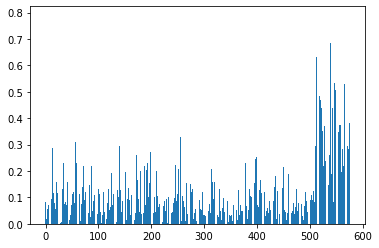

In [31]:
plt.bar(list(range(len(clf.coef_[0]))),abs(clf.coef_[0]))

In [32]:
w_indexs

[512, 64]

In [34]:
sum(abs(clf.coef_[0][:w_indexs[0]]))

43.14751534402697

In [35]:
sum(abs(clf.coef_[0][w_indexs[0]:]))

23.657707569403648

In [19]:
clf.score(X, y_lr_test)

0.9893719806763285

In [ ]:
ranking[0][0:30]

array([557, 568, 516, 558, 538, 573, 517, 515, 571, 533, 518, 513, 552,
       566, 521, 512, 574, 560, 570, 534,  24, 564, 446, 553, 543, 569,
       529, 537, 535, 563])

In [ ]:
sum(y_lr_test)/len(y_lr_test)

0.7159420289855073

In [41]:
ranking1 = ranking[ranking < w_indexs[0]]
ranking2 = ranking[ranking >= w_indexs[0]]

In [43]:
ranking2

array([540, 539, 513, 525, 538, 546, 547, 566, 559, 549, 563, 557, 519,
       518, 552, 520, 534, 527, 574, 522, 543, 553, 536, 550, 568, 515,
       575, 558, 556, 528, 570, 567, 524, 554, 517, 521, 544, 542, 533,
       532, 561, 571, 569, 516, 562, 573, 551, 512, 537, 565, 530, 529,
       523, 555, 531, 526, 514, 564, 572, 548, 560, 541, 535, 545])

In [47]:
np.concatenate((ranking1[:5],ranking2[:5]), axis=0)

array([255,  57, 511, 140,  13, 540, 539, 513, 525, 538])

In [49]:
np.concatenate((ranking1[0:math.floor(512*perc)],ranking2[0:math.floor(64*perc)]), axis=0)

array([255,  57, 511, 140,  13, 495, 199,  41, 172,  58, 399, 397,  34,
       193,  59, 378, 462, 246, 187,  87, 156,  72, 450, 254, 314, 111,
       252, 387, 191, 376, 180, 210, 151, 493,  78, 125,  56, 317, 491,
       460, 302, 245, 435, 319, 307,  35, 398, 396,  88,  75, 235, 407,
       174,  33, 474,  92, 316,  77,  42,  21,  43, 320, 410, 290, 395,
       267, 253, 197, 236,  79, 274, 154,  65,  83, 446,  63, 247, 203,
        70, 457, 466, 194, 135, 433,   3, 202,  90,  18, 157, 107, 448,
       459, 147, 143, 266, 468, 391, 368, 329, 119, 278,  32, 540, 539,
       513, 525, 538, 546, 547, 566, 559, 549, 563, 557])

# Getting some % of neurons

In [36]:
perc = 0.2
N = sum(w_indexs)

In [50]:
bin_opt = np.zeros(N)
idx = np.concatenate((ranking1[0:math.floor(512*perc)],ranking2[0:math.floor(64*perc)]), axis=0)

for id in idx:
  bin_opt[id] = 1

n_of_points = X_test_tok.shape[0]
cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)
Acc = 0

for i in range(n_of_points):
  if(i%500 == 499):
    print(i+1)
  out = np.reshape(X_test_tok[i], (1,128))
  last_lay_input = None
  l_C = 0
  for lay in list(map(lambda x: x.name, model.layers)):
    if(last_lay_input is None ):
      last_lay_input = model.input
    intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
    out = intermediate_output(out)
    if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
      shape = out.shape
      out = tf.reshape(out, [-1]) * bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
      out = tf.reshape(out, shape)
      l_C +=1
    last_lay_input = model.get_layer(lay).output
  

  if((out[0][0] > 0.5 and y_lr_test[i]==1) or (out[0][0] < 0.5 and y_lr_test[i]==0)):
    Acc +=1

print(Acc/n_of_points)

500
1000
0.9507246376811594


In [ ]:
bin_opt = np.zeros(N)
idx = ranking[0][math.floor(N*perc):math.floor(N*perc*2)]
for id in idx:
  bin_opt[id] = 1

n_of_points = X_test_tok.shape[0]
cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)
Acc = 0

for i in range(n_of_points):
  if(i%500 == 499):
    print(i+1)
  out = np.reshape(X_test_tok[i], (1,128))
  last_lay_input = None
  l_C = 0
  for lay in list(map(lambda x: x.name, model.layers)):
    if(last_lay_input is None ):
      last_lay_input = model.input
    intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
    out = intermediate_output(out)
    if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
      shape = out.shape
      out = tf.reshape(out, [-1]) * bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
      out = tf.reshape(out, shape)
      l_C +=1
    last_lay_input = model.get_layer(lay).output
  

  if((out[0][0] > 0.5 and y_lr_test[i]==1) or (out[0][0] < 0.5 and y_lr_test[i]==0)):
    Acc +=1

print(Acc/n_of_points)

500
1000
0.9169082125603865


In [ ]:
bin_opt = np.zeros(N)
idx = ranking[0][math.floor(N*perc*2):math.floor(N*perc*3)]
for id in idx:
  bin_opt[id] = 1

n_of_points = X_test_tok.shape[0]
cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)
Acc = 0

for i in range(n_of_points):
  if(i%500 == 499):
    print(i+1)
  out = np.reshape(X_test_tok[i], (1,128))
  last_lay_input = None
  l_C = 0
  for lay in list(map(lambda x: x.name, model.layers)):
    if(last_lay_input is None ):
      last_lay_input = model.input
    intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
    out = intermediate_output(out)
    if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
      shape = out.shape
      out = tf.reshape(out, [-1]) * bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
      out = tf.reshape(out, shape)
      l_C +=1
    last_lay_input = model.get_layer(lay).output
  

  if((out[0][0] > 0.5 and y_lr_test[i]==1) or (out[0][0] < 0.5 and y_lr_test[i]==0)):
    Acc +=1

print(Acc/n_of_points)

500
1000
0.7159420289855073


In [ ]:
bin_opt = np.zeros(N)
idx = ranking[0][math.floor(N*perc*3):math.floor(N*perc*4)]
for id in idx:
  bin_opt[id] = 1

n_of_points = X_test_tok.shape[0]
cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)
Acc = 0

for i in range(n_of_points):
  if(i%500 == 499):
    print(i+1)
  out = np.reshape(X_test_tok[i], (1,128))
  last_lay_input = None
  l_C = 0
  for lay in list(map(lambda x: x.name, model.layers)):
    if(last_lay_input is None ):
      last_lay_input = model.input
    intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
    out = intermediate_output(out)
    if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
      shape = out.shape
      out = tf.reshape(out, [-1]) * bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
      out = tf.reshape(out, shape)
      l_C +=1
    last_lay_input = model.get_layer(lay).output
  

  if((out[0][0] > 0.5 and y_lr_test[i]==1) or (out[0][0] < 0.5 and y_lr_test[i]==0)):
    Acc +=1

print(Acc/n_of_points)

500
1000
0.9256038647342996


In [ ]:
bin_opt = np.zeros(N)
idx = ranking[0][math.floor(N*perc*4):math.floor(N*perc*5)]
for id in idx:
  bin_opt[id] = 1

n_of_points = X_test_tok.shape[0]
cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)
Acc = 0

for i in range(n_of_points):
  if(i%500 == 499):
    print(i+1)
  out = np.reshape(X_test_tok[i], (1,128))
  last_lay_input = None
  l_C = 0
  for lay in list(map(lambda x: x.name, model.layers)):
    if(last_lay_input is None ):
      last_lay_input = model.input
    intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
    out = intermediate_output(out)
    if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
      shape = out.shape
      out = tf.reshape(out, [-1]) * bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
      out = tf.reshape(out, shape)
      l_C +=1
    last_lay_input = model.get_layer(lay).output
  

  if((out[0][0] > 0.5 and y_lr_test[i]==1) or (out[0][0] < 0.5 and y_lr_test[i]==0)):
    Acc +=1

print(Acc/n_of_points)

500
1000
0.9207729468599034


In [ ]:
perc = 0.2
N = sum(w_indexs)

In [ ]:
bin_opt = np.zeros(N)
idx = ranking[0][0:math.floor(N*(1-perc))]
for id in idx:
  bin_opt[id] = 1

n_of_points = X_test_tok.shape[0]
cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)
Acc = 0

for i in range(n_of_points):
  if(i%500 == 499):
    print(i+1)
  out = np.reshape(X_test_tok[i], (1,128))
  last_lay_input = None
  l_C = 0
  for lay in list(map(lambda x: x.name, model.layers)):
    if(last_lay_input is None ):
      last_lay_input = model.input
    intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
    out = intermediate_output(out)
    if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
      shape = out.shape
      out = tf.reshape(out, [-1]) * bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
      out = tf.reshape(out, shape)
      l_C +=1
    last_lay_input = model.get_layer(lay).output
  

  if((out[0][0] > 0.5 and y_lr_test[i]==1) or (out[0][0] < 0.5 and y_lr_test[i]==0)):
    Acc +=1

print(Acc/n_of_points)

500
1000
0.9739130434782609


In [ ]:
bin_opt = np.zeros(N)
idx = ranking[0][math.floor(N*perc):-1]
for id in idx:
  bin_opt[id] = 1

n_of_points = X_test_tok.shape[0]
cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)
Acc = 0

for i in range(n_of_points):
  if(i%500 == 499):
    print(i+1)
  out = np.reshape(X_test_tok[i], (1,128))
  last_lay_input = None
  l_C = 0
  for lay in list(map(lambda x: x.name, model.layers)):
    if(last_lay_input is None ):
      last_lay_input = model.input
    intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
    out = intermediate_output(out)
    if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
      shape = out.shape
      out = tf.reshape(out, [-1]) * bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
      out = tf.reshape(out, shape)
      l_C +=1
    last_lay_input = model.get_layer(lay).output
  

  if((out[0][0] > 0.5 and y_lr_test[i]==1) or (out[0][0] < 0.5 and y_lr_test[i]==0)):
    Acc +=1

print(Acc/n_of_points)

500
1000
0.9449275362318841


# Viz - On first model

In [ ]:
for i in range(len(y_lr_test)):
  if(y_lr_test[i]==0):
    print(i," " ,len(X_test_l[i]))
  if(i == 400):
    break

In [ ]:
X_test_l = X_test.tolist()

In [58]:
def clear_string(s):
  s = s.replace("\n","").replace("\x01","").replace(".","").replace(",","").replace("-","").replace("/","")
  s = re.sub(" +", " ", s)
  s = re.sub(" +", " ", s)
  return s

def split_string(word):
  word = word.split(" ")
  words = []
  for i in range(len(word)):
    w = [x for j,x in enumerate(word) if j!=i]
    words.append(' '.join(w))
  
  return words

def tok_string(s):
  s = tokenizer.texts_to_sequences(pd.Series(s))
  s = pad_sequences(s, truncating = 'post', padding='post', maxlen=128)
  return s

def do_all(s):
  s = clear_string(s)
  s = split_string(s)
  s = tok_string(s)
  return s

In [ ]:
ind = 98
word = clear_string(X_test_l[ind]).split(" ")
words = do_all(X_test_l[ind])

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 3):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] >= NN):
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(np.abs(v_m-np.mean(v_m)))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

put an end to unwanted spam popups and other internet security hazards permanently more info here  


In [ ]:
clear_string(X_test_l[360])

'great gift idea ! click here for a free bottle ! the saversclub this offer was sent to you as a valued subscriberof the savers club if you would prefer not to receive further emails fromthe savers club and wish to remove your name and e mail address from our database please click here or write us at : md 38900 fm 1774 magnolia tx 77355'

In [ ]:
ind = 360
word = clear_string(X_test_l[ind]).split(" ")
words = do_all(X_test_l[ind])

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 3):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] >= NN):
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(np.abs(v_m-np.mean(v_m)))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

great gift idea ! click here for a free bottle ! the saversclub this offer was sent to you as a valued subscriberof the savers club if you would prefer not to receive further emails fromthe savers club and wish to remove your name and e mail address from our database please click here or write us at : md 38900 fm 1774 magnolia tx 77355 


In [ ]:
clear_string(X_test_l[369])

"( please wait for above image to load ) don ' t overpay for the same results ! limited time only we ' ll double your order for free click here for more details !"

In [ ]:
ind = 369
word = clear_string(X_test_l[ind]).split(" ")
words = do_all(X_test_l[ind])

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 3):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] >= NN):
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(np.abs(v_m-np.mean(v_m)))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

( please wait for above image to load ) don ' t overpay for the same results ! limited time only we ' ll double your order for free click here for more details ! 


In [ ]:
clear_string(X_test_l[8])

"improving the quality of people ' s lives is what prescription medications are designed to do and we believe that you deserve access to these medications by having doctors available to review your needs pharmacourt is ready to help you get the medications you need you can now order vgr vlm xnx securely and discreetly make it easy for you to order meds we ship worldwide ! no forms to fill out we respect your privacy ! everyone is approved us fda approved qfzaudi a utfgva pjxefobpklirumlrm xm qiaus gh ai"

In [73]:
ind = 8
word = clear_string(X_test_l[ind]).split(" ")
words = do_all(X_test_l[ind])

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 3):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] >= NN):
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(np.abs(v_m-np.mean(v_m)))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

InvalidArgumentError: ignored

In [ ]:
for i in range(len(y_lr_test)):
  if(y_lr_test[i]==1):
    print(i," " ,len(X_test_l[i]))
  if(i == 40):
    break

0   57
1   737
3   2806
4   1223
5   56
6   1475
7   1142
10   1879
11   493
13   256
16   52
18   965
19   172
20   1348
21   2170
24   38
26   271
27   334
28   58
29   319
30   3486
31   589
33   2536
34   85
35   5980
36   2000
37   56
40   180


In [ ]:
clear_string(X_test_l[40])

'previous nomination had dec 15 2000 in the subject line but the attached file had the correct effective dates ( see attached file : hplnl 216 xls ) hplnl 216 xls'

In [72]:
ind = 40
word = clear_string(X_test_l[ind]).split(" ")
words = do_all(X_test_l[ind])

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 3):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] >= NN):
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(np.abs(v_m-np.mean(v_m)))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

InvalidArgumentError: ignored

In [ ]:
clear_string(X_test_l[27])

'we agree " eileen ponton " on 05 08 2001 10 : 49 : 40 am to : david avila lsp enserch us @ tu charlie stone texas utilities @ tu melissa jones texas utilities @ tu hpl scheduling @ enron com liz bellamy @ enron com cc : subject : noms actual for may 8 th nom mcf mmbtu 30 000 29 939 30 748'

In [ ]:
ind = 27
word = clear_string(X_test_l[ind]).split(" ")
words = do_all(X_test_l[ind])

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 3):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] >= NN):
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(np.abs(v_m-np.mean(v_m)))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

we agree " eileen ponton " on 05 08 2001 10 : 49 : 40 am to : david avila lsp enserch us @ tu charlie stone texas utilities @ tu melissa jones texas utilities @ tu hpl scheduling @ enron com liz bellamy @ enron com cc : subject : noms actual for may 8 th nom mcf mmbtu 30 000 29 939 30 748 


# Viz - On second model

In [ ]:
for i in range(len(y_lr_test)):
  if(y_lr_test[i]==0):
    print(i," " ,len(X_test_l[i]))
  if(i == 40):
    break

3   753
6   1041
8   813
10   147
12   641
13   152
14   107
22   649
24   639
25   257
26   0
27   0
29   3870
32   1157
35   50
36   188
37   906
38   323
39   2361


In [ ]:
for i in range(len(y_lr_test)):
  if(y_lr_test[i]==1):
    print(i," " ,len(X_test_l[i]))
  if(i == 40):
    break

0   181
1   194
2   876
4   1041
5   1481
7   1546
9   1752
11   1307
15   422
16   151
17   49
18   58
19   1086
20   370
21   56
23   1221
28   58
30   56
31   482
33   1768
34   1006
40   457


In [ ]:
X_test_l = X_test.tolist()

In [ ]:
def clear_string(s):
  s = s.replace("\n","").replace("\x01","").replace(".","").replace(",","").replace("-","").replace("/","")
  s = re.sub(" +", " ", s)
  s = re.sub(" +", " ", s)
  return s

def split_string(word):
  word = word.split(" ")
  words = []
  for i in range(len(word)):
    w = [x for j,x in enumerate(word) if j!=i]
    words.append(' '.join(w))
  
  return words

def tok_string(s):
  s = tokenizer.texts_to_sequences(pd.Series(s))
  s = pad_sequences(s, truncating = 'post', padding='post', maxlen=128)
  return s

def do_all(s):
  s = clear_string(s)
  s = split_string(s)
  s = tok_string(s)
  return s

In [ ]:
clear_string(X_test_l[14])

"hello from amazon com we ' re writing to confirm that we have processed your refund for $ 18 00 for the above referenced order this amount should appear as a credit on your next credit card statement for more information about this refund please visit your account ( http : www amazon com your account ) to view the above referenced order completed returns and refunds will appear at the bottom of the order summary page we hope that this is a satisfactory resolution for you if you have any questions please contact us via e mail fax or phone : e mail : orders @ amazon com fax : 1 206 266 2950 phone : 1 800 201 7575 for us customers 1 206 266 2992 for international customers thank you for shopping at amazon com amazon com earth ' s biggest selection info @ amazon com http : www amazon com "

In [ ]:
ind = 14
word = clear_string(X_test_l[ind]).split(" ")
words = do_all(X_test_l[ind])

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          #print("NN:",NN," LC:", l_C)
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(v_m-np.mean(v_m))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

genuine repiica watches over 20 brands including rolex omega iwc more detalls here r emove me 


In [77]:
clear_string(X_test_l[56])

'can you please extend sitara deal ticket 16888 to the 15 th ? 14 dec flowed on this day thanks jackie '

In [81]:
ind = 56
word = clear_string(X_test_l[ind]).split(" ")
words = do_all(X_test_l[ind])

top_n = [ranking1[0],ranking1[1]]#ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          #print("NN:",NN," LC:", l_C)
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(v_m-np.mean(v_m))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

can you please extend sitara deal ticket 16888 to the 15 th [1;48;2;255;-291;-291m? 14 dec flowed [1;48;2;255;-291;-291mon [1;48;2;255;-291;-291mthis [1;48;2;255;-291;-291mday [1;48;2;255;-291;-291mthanks [1;48;2;255;-291;-291mjackie [1;48;2;255;-291;-291m 


In [ ]:
clear_string(X_test_l[36])

'for the sake of one good action a hundred evil ones should be forgotten to accomplish more redirect your mental energy by continuously reminding yourself of all the things you do right'

In [ ]:
ind = 36
word = clear_string(X_test_l[ind]).split(" ")
words = do_all(X_test_l[ind])

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          #print("NN:",NN," LC:", l_C)
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(v_m-np.mean(v_m))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

for the sake of one good action a hundred evil ones should be forgotten to accomplish more redirect your mental energy by continuously reminding yourself of all the things you do right 


In [ ]:
clear_string(X_test_l[38])

"pc weekly : system comparison wlndows x ' p pro + offlce x ' p pro 80 doiiar ( 80 % off ! ) wlndows x ' p 50 doiiar ( 75 % off ! ) complete results rosary babyneuralgia maple unitarybathroom vexatious yoreprimitivism as carvencyanamid oak conducebernhard zoom duetaarhus terrible yeast goerjames satin hatefulye"

In [ ]:
X_test_l[38]

"pc weekly : system comparison\n wlndows x ' p pro + offlce x ' p pro - 80 doiiar ( 80 % off ! )\n wlndows x ' p - 50 doiiar ( 75 % off ! )\n complete results\n rosary babyneuralgia maple unitarybathroom\n vexatious yoreprimitivism as carvencyanamid\n oak conducebernhard zoom duetaarhus\n terrible yeast goerjames\n satin hatefulye"

In [ ]:
ind = 38
word = clear_string(X_test_l[ind]).split(" ")
words = do_all(X_test_l[ind])

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          #print("NN:",NN," LC:", l_C)
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(v_m-np.mean(v_m))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

wor = tokenizer.texts_to_sequences([X_test_l[ind]])
wor = pad_sequences(wor, truncating = 'post', padding='post', maxlen=128)

model.predict(wor)

pc weekly : system comparison wlndows x ' p pro + offlce x ' p pro 80 doiiar ( 80 % off ! ) wlndows x ' p 50 doiiar ( 75 % off ! ) complete results rosary babyneuralgia maple unitarybathroom vexatious yoreprimitivism as carvencyanamid oak conducebernhard zoom duetaarhus terrible yeast goerjames satin hatefulye 
1/1 [==============================] - 0s 15ms/step


array([[6.3367991e-04, 9.9936634e-01]], dtype=float32)

In [ ]:
clear_string(X_test_l[1])

'please note the following volume changes for december 2000 : deal # meter # counterparty trade zone from to 126281 6296 eog res 1 5 412 4 000 125822 9658 kcs res 16 9 379 7 500 bob'

In [ ]:
ind = 1
word = clear_string(X_test_l[ind]).split(" ")
words = do_all(X_test_l[ind])

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          #print("NN:",NN," LC:", l_C)
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(v_m-np.mean(v_m))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  a = max(min(1,a),-1)
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

wor = tokenizer.texts_to_sequences([X_test_l[ind]])
wor = pad_sequences(wor, truncating = 'post', padding='post', maxlen=128)

model.predict(wor)

please note the following volume changes for december 2000 : deal # meter # counterparty trade zone from to 126281 6296 eog res 1 5 412 4 000 125822 9658 kcs res 16 9 379 7 500 bob 
1/1 [==============================] - 0s 15ms/step


array([[9.999939e-01, 6.067719e-06]], dtype=float32)

In [ ]:
clear_string(X_test_l[4])

'skydive spaceland ? ? november december specials www skydivespaceland com this one s for you ( ( " i ve always wanted to skydive but i just can t afford it " now you can ! for the rest of the year skydive spaceland will knock $ 50 off your first tandem skydive now it s affordable ! no more excuses come on out and change your life forever make your reservations now call 1 ( 800 ) sky dive ? ? christmas gift certificates if you re looking at a gift for someone who seems to have it all give them the most unforgettable gift of a lifetime ( a tandem skydive ! we have a classic gift certificate framed and ready for shipment for that special person make this christmas season last a lifetime directions from houston take hwy 288 south once you pass beltway 8 go 17 miles on hwy 288 and take 1462 ( alvin rosharon ) exit go right on fm 1462 ( 2 1 miles ) to red light ( fm 521 ) go right on fm 521 ( 1 2 mile ) airport entrance is on right'

In [ ]:
ind = 4
word = clear_string(X_test_l[ind]).split(" ")
words = do_all(X_test_l[ind])

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          #print("NN:",NN," LC:", l_C)
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(v_m-np.mean(v_m))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  a = max(min(1,a),-1)
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

wor = tokenizer.texts_to_sequences([X_test_l[ind]])
wor = pad_sequences(wor, truncating = 'post', padding='post', maxlen=128)

model.predict(wor)

skydive spaceland ? ? november december specials www skydivespaceland com this one s for you ( ( " i ve always wanted to skydive but i just can t afford it " now you can ! for the rest of the year skydive spaceland will knock $ 50 off your first tandem skydive now it s affordable ! no more excuses come on out and change your life forever make your reservations now call 1 ( 800 ) sky dive ? ? christmas gift certificates if you re looking at a gift for someone who seems to have it all give them the most unforgettable gift of a lifetime ( a tandem skydive ! we have a classic gift certificate framed and ready for shipment for that special person make this christmas season last a lifetime directions from houston take hwy 288 south once you pass beltway 8 go 17 miles on hwy 288 and take 1462 ( alvin rosharon ) exit go right on fm 1462 ( 2 1 miles ) to red light ( fm 521 ) go right on fm 521 ( 1 2 mile ) airport entrance is on right 
1/1 [==============================] - 0s 19ms/step


array([[0.04815724, 0.9518427 ]], dtype=float32)

In [ ]:
clear_string(X_test_l[5])

"daren i believe the best way to enter the fee into sitara would be as a demand fee in your example # 1 if we do the fee this way we will not double up the volumes i have attached my spreadsheet for support : the most current worksheet is tab # 2 marked final column g is the over delivery quantity total is 17 278 mmbtus column s is the daily dollar amount for the over delivery quantity due hplc $ 1 008 87 column t is the daily dollar amount for the over delivery quantity due the customer $ 519 73 thanks katherine 5 8643 daren j farmer @ ect 08 31 2000 05 : 49 pm to : katherine herrera corp enron @ enron cc : subject : re : duke exchange deal feb 2000 prod katherine there are 2 ways that i can enter this fee into sitara : 1 ) i can put the dollar amount in on day 1 as a demand or facility fee 2 ) i need you to give me volume ( s ) and a price to input into the deal i can ' t just input a dollar amount in sitara let me know how you want to handle it d katherine herrera @ enron 08 31 2000

In [ ]:
ind = 5
word = clear_string(X_test_l[ind]).split(" ")
words = do_all(X_test_l[ind])

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          #print("NN:",NN," LC:", l_C)
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(v_m-np.mean(v_m))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  a = max(min(1,a),-1)
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

wor = tokenizer.texts_to_sequences([X_test_l[ind]])
wor = pad_sequences(wor, truncating = 'post', padding='post', maxlen=128)

model.predict(wor)

daren i believe the best way to enter the fee into sitara would be as a demand fee in your example # 1 if we do the fee this way we will not double up the volumes i have attached my spreadsheet for support : the most current worksheet is tab # 2 marked final column g is the over delivery quantity total is 17 278 mmbtus column s is the daily dollar amount for the over delivery quantity due hplc $ 1 008 87 column t is the daily dollar amount for the over delivery quantity due the customer $ 519 73 thanks katherine 5 8643 daren j farmer @ ect 08 31 2000 05 : 49 pm to : katherine herrera corp enron @ enron cc : subject : re : duke exchange deal feb 2000 prod katherine there are 2 ways that i can enter this fee into sitara : 1 ) i can put the dollar amount in on day 1 as a demand or facility fee 2 ) i need you to give me volume ( s ) and a price to input into the deal i can ' t just input a dollar amount in sitara let me know how you want to handle it d katherine herrera @ enron 08 31 2000 

array([[9.9999928e-01, 6.9657625e-07]], dtype=float32)

In [ ]:
clear_string(X_test_l[40])

'hi darrin rita has asked me to provide her with all the " deal numbers " associated for the cornhusker ( tenaska iv texas partners ) deal when you get a chance would you please send me those deal numbers even though i can print reports such as the " deal volume tracking report " to retrieve some of the deal numbers rita was concerned that there might be other deals set up in unify which we don \' t know about thank you kathy : )'

In [ ]:
ind = 40
word = clear_string(X_test_l[ind]).split(" ")
words = do_all(X_test_l[ind])

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          #print("NN:",NN," LC:", l_C)
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(v_m-np.mean(v_m))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  a = max(min(1,a),-1)
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

wor = tokenizer.texts_to_sequences([X_test_l[ind]])
wor = pad_sequences(wor, truncating = 'post', padding='post', maxlen=128)

model.predict(wor)

hi darrin rita has asked me to provide her with all the " deal numbers " associated for the cornhusker ( tenaska iv texas partners ) deal when you get a chance would you please send me those deal numbers even though i can print reports such as the " deal volume tracking report " to retrieve some of the deal numbers rita was concerned that there might be other deals set up in unify which we don ' t know about thank you kathy : ) 
1/1 [==============================] - 0s 15ms/step


array([[9.9994075e-01, 5.9186579e-05]], dtype=float32)

In [ ]:
ranking[0][0:2]

array([545, 558])

In [ ]:
ind = 40
word = clear_string(X_test_l[ind]).split(" ")
words = do_all(X_test_l[ind])

top_n = ranking[0][1:2]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n
  print(NN)

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          #print("NN:",NN," LC:", l_C)
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(v_m-np.mean(v_m))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  a = max(min(1,a),-1)
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

wor = tokenizer.texts_to_sequences([X_test_l[ind]])
wor = pad_sequences(wor, truncating = 'post', padding='post', maxlen=128)

model.predict(wor)

558
hi darrin rita has asked me to provide her with all the " deal numbers " associated for the cornhusker ( tenaska iv texas partners ) deal when you get a chance would you please send me those deal numbers even though i can print reports such as the " deal volume tracking report " to retrieve some of the deal numbers rita was concerned that there might be other deals set up in unify which we don ' t know about thank you kathy : ) 
1/1 [==============================] - 0s 22ms/step


array([[9.9994075e-01, 5.9186579e-05]], dtype=float32)

In [ ]:
ind = 40
word = clear_string(X_test_l[ind]).split(" ")
words = do_all(X_test_l[ind])

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          #print("NN:",NN," LC:", l_C)
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = vals
  if(sum(v_m) > 0):
    str = '' + f'{NN}' + ' '
    norm = max(v_m-np.mean(v_m))
    for i in range(len(words)):
      a = (v_m[i]-np.mean(v_m)) / norm
      a = max(min(1,a),-1)
      r = int(255 + min(0, -255*a))
      g = int(255 + min(0, 255*a))
      b = int(255*(1-abs(a)))
      str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

    print(str)


558 hi darrin rita has asked me to provide her with all the " deal numbers " associated for the cornhusker ( tenaska iv texas partners ) deal when you get a chance would you please send me those deal numbers even though i can print reports such as the " deal volume tracking report " to retrieve some of the deal numbers rita was concerned that there might be other deals set up in unify which we don ' t know about thank you kathy : ) 
575 hi darrin rita has asked me to provide her with all the " deal numbers " associated for the cornhusker ( tenaska iv texas partners ) deal when you get a chance would you please send me those deal numbers even though i can print reports such as the " deal volume tracking report " to retrieve some of the deal numbers rita was concerned that there might be other deals set up in unify which we don ' t know about thank you kathy : ) 
567 hi darrin rita has asked me to provide her with all the " deal numbers " associated for the cornhusker ( tenaska iv texas 

In [ ]:
ind = 40
word = clear_string(X_test_l[ind]).split(" ")
words = do_all(X_test_l[ind])

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          #print("NN:",NN," LC:", l_C)
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = vals
  if(sum(v_m) > 0):
    str = '' + '{:^{width}}'.format(NN, width=3) + ' '
    norm = max(v_m-np.mean(v_m))
    for i in range(len(words)):
      a = (v_m[i]-np.mean(v_m)) / norm
      a = max(min(1,a),-1)
      r = int(255 + min(0, -255*a))
      g = int(255 + min(0, 255*a))
      b = int(255*(1-abs(a)))
      str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

    print(str)


558 hi darrin rita has asked me to provide her with all the " deal numbers " associated for the cornhusker ( tenaska iv texas partners ) deal when you get a chance would you please send me those deal numbers even though i can print reports such as the " deal volume tracking report " to retrieve some of the deal numbers rita was concerned that there might be other deals set up in unify which we don ' t know about thank you kathy : ) 
575 hi darrin rita has asked me to provide her with all the " deal numbers " associated for the cornhusker ( tenaska iv texas partners ) deal when you get a chance would you please send me those deal numbers even though i can print reports such as the " deal volume tracking report " to retrieve some of the deal numbers rita was concerned that there might be other deals set up in unify which we don ' t know about thank you kathy : ) 
567 hi darrin rita has asked me to provide her with all the " deal numbers " associated for the cornhusker ( tenaska iv texas 

In [ ]:
ind = 40
word = clear_string(X_test_l[ind]).split(" ")
words = do_all(X_test_l[ind])

top_n = ranking[0][0:40]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          #print("NN:",NN," LC:", l_C)
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = vals
  if(sum(v_m) > 0):
    str = '' + '{:^{width}}'.format(NN, width=3) + ' '
    norm = max(v_m-np.mean(v_m))
    for i in range(len(words)):
      a = (v_m[i]-np.mean(v_m)) / norm
      a = max(min(1,a),-1)
      r = int(255 + min(0, -255*a))
      g = int(255 + min(0, 255*a))
      b = int(255*(1-abs(a)))
      str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

    print(str)


558 hi darrin rita has asked me to provide her with all the " deal numbers " associated for the cornhusker ( tenaska iv texas partners ) deal when you get a chance would you please send me those deal numbers even though i can print reports such as the " deal volume tracking report " to retrieve some of the deal numbers rita was concerned that there might be other deals set up in unify which we don ' t know about thank you kathy : ) 
575 hi darrin rita has asked me to provide her with all the " deal numbers " associated for the cornhusker ( tenaska iv texas partners ) deal when you get a chance would you please send me those deal numbers even though i can print reports such as the " deal volume tracking report " to retrieve some of the deal numbers rita was concerned that there might be other deals set up in unify which we don ' t know about thank you kathy : ) 
567 hi darrin rita has asked me to provide her with all the " deal numbers " associated for the cornhusker ( tenaska iv texas 

# My sentance

In [ ]:
myWords = 'Hello, do you want free money? Click here to get some!'
word = clear_string(myWords).split(" ")
words = do_all(myWords)

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(np.abs(v_m-np.mean(v_m)))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

wor = tokenizer.texts_to_sequences([myWords])
wor = pad_sequences(wor, truncating = 'post', padding='post', maxlen=128)

model.predict(wor)

Hello do you want free money? Click here to get some! 
1/1 [==============================] - 0s 77ms/step


array([[2.572511e-04, 9.997427e-01]], dtype=float32)

In [ ]:
myWords = 'Your package has been temporarily confiscated. To get it back go to link:'
word = clear_string(myWords).split(" ")
words = do_all(myWords)

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(np.abs(v_m-np.mean(v_m)))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

Your package has been temporarily confiscated To get it back go to link: 


In [ ]:
myWords = 'Download royal casino to get achance to win your free Iphone 15 or rolex watch'
word = clear_string(myWords).split(" ")
words = do_all(myWords)

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(np.abs(v_m-np.mean(v_m)))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

wor = tokenizer.texts_to_sequences([myWords])
wor = pad_sequences(wor, truncating = 'post', padding='post', maxlen=128)

model.predict(wor)

Download royal casino to get achance to win your free Iphone 15 or rolex watch 
1/1 [==============================] - 0s 20ms/step


array([[0.00283934, 0.9971607 ]], dtype=float32)

In [ ]:
myWords = 'Buy our super duper product that makes you a better person!'
word = clear_string(myWords).split(" ")
words = do_all(myWords)

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(np.abs(v_m-np.mean(v_m)))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)
wor = tokenizer.texts_to_sequences([myWords])
wor = pad_sequences(wor, truncating = 'post', padding='post', maxlen=128)

model.predict(wor)

Buy our super duper product that makes you a better person! 
1/1 [==============================] - 0s 21ms/step


array([[0.0066648, 0.9933351]], dtype=float32)

In [ ]:
myWords = 'Hi, its Marcin ! Are you still up for climbing trip on monday?'
word = clear_string(myWords).split(" ")
words = do_all(myWords)

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(np.abs(v_m-np.mean(v_m)))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)
wor = tokenizer.texts_to_sequences([myWords])
wor = pad_sequences(wor, truncating = 'post', padding='post', maxlen=128)

model.predict(wor)

Hi its Marcin ! Are you still up for climbing trip on monday? 
1/1 [==============================] - 0s 23ms/step


array([[0.08005702, 0.91994303]], dtype=float32)

In [ ]:
myWords = 'Watch my amazing anti spam detection presentation for free ! Click here for more amazing google slides presentations. The cost may vary based on day of a week.'
word = clear_string(myWords).split(" ")
words = do_all(myWords)

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(np.abs(v_m-np.mean(v_m)))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)
wor = tokenizer.texts_to_sequences([myWords])
wor = pad_sequences(wor, truncating = 'post', padding='post', maxlen=128)

model.predict(wor)

Watch my amazing anti spam detection presentation for free ! Click here for more amazing google slides presentations The cost may vary based on day of a week 
1/1 [==============================] - 0s 16ms/step


array([[2.4889389e-04, 9.9975115e-01]], dtype=float32)

# My sentance - train test learn

In [ ]:
myWords = 'Hello, do you want free money? Click here to get some!'
word = clear_string(myWords).split(" ")
words = do_all(myWords)

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(np.abs(v_m-np.mean(v_m)))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

wor = tokenizer.texts_to_sequences([myWords])
wor = pad_sequences(wor, truncating = 'post', padding='post', maxlen=128)

model.predict(wor)

Hello do you want free money? Click here to get some! 
1/1 [==============================] - 0s 55ms/step


array([[9.4104034e-04, 9.9905902e-01]], dtype=float32)

In [ ]:
myWords = 'Your package has been temporarily confiscated. To get it back go to link:'
word = clear_string(myWords).split(" ")
words = do_all(myWords)

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(np.abs(v_m-np.mean(v_m)))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

wor = tokenizer.texts_to_sequences([myWords])
wor = pad_sequences(wor, truncating = 'post', padding='post', maxlen=128)

model.predict(wor)

Your package has been temporarily confiscated To get it back go to link: 
1/1 [==============================] - 0s 24ms/step


array([[0.13563107, 0.8643689 ]], dtype=float32)

In [ ]:
myWords = 'Download royal casino to get achance to win your free Iphone 15 or rolex watch'
word = clear_string(myWords).split(" ")
words = do_all(myWords)

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(np.abs(v_m-np.mean(v_m)))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)

wor = tokenizer.texts_to_sequences([myWords])
wor = pad_sequences(wor, truncating = 'post', padding='post', maxlen=128)

model.predict(wor)

Download royal casino to get achance to win your free Iphone 15 or rolex watch 
1/1 [==============================] - 0s 15ms/step


array([[0.02171822, 0.9782818 ]], dtype=float32)

In [ ]:
myWords = 'Buy our super duper product that makes you a better person!'
word = clear_string(myWords).split(" ")
words = do_all(myWords)

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(np.abs(v_m-np.mean(v_m)))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)
wor = tokenizer.texts_to_sequences([myWords])
wor = pad_sequences(wor, truncating = 'post', padding='post', maxlen=128)

model.predict(wor)

Buy our super duper product that makes you a better person! 
1/1 [==============================] - 0s 19ms/step


array([[0.00300152, 0.99699855]], dtype=float32)

In [ ]:
myWords = 'Note! Red and Green colors in each sentance don\'t mean green is ham and red is not'
word = clear_string(myWords).split(" ")
words = do_all(myWords)

top_n = ranking[0][0:100]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = v_m + vals

str = ''
norm = max(np.abs(v_m-np.mean(v_m)))
for i in range(len(words)):
  a = (v_m[i]-np.mean(v_m)) / norm
  r = int(255 + min(0, -255*a))
  g = int(255 + min(0, 255*a))
  b = int(255*(1-abs(a)))
  str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

print(str)
wor = tokenizer.texts_to_sequences([myWords])
wor = pad_sequences(wor, truncating = 'post', padding='post', maxlen=128)

model.predict(wor)

Note! Red and Green colors in each sentance don't mean green is ham and red is not 
1/1 [==============================] - 0s 22ms/step


array([[0.12891933, 0.8710807 ]], dtype=float32)

In [ ]:
myWords = 'Watch my amazing anti spam detection presentation for free ! Click here for more amazing google slides presentations. The cost may vary based on day of a week.'
word = clear_string(myWords).split(" ")
words = do_all(myWords)

top_n = ranking[0][0:20]
v_m =np.array([0]*len(word))

for neuron_n in top_n:
  NN = neuron_n

  n_of_points = len(words)
  cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

  vals = []

  for i in range(n_of_points):

    out = np.reshape(words[i], (1,128))
    last_lay_input = None
    l_C = 0
    for lay in list(map(lambda x: x.name, model.layers)):
      if(last_lay_input is None ):
        last_lay_input = model.input
      intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
      out = intermediate_output(out)
      if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
        if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
          shape = out.shape
          out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
          vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
          out = tf.reshape(out, shape)
        l_C +=1
      last_lay_input = model.get_layer(lay).output
  
  v_m = vals
  if(sum(v_m) > 0):
    str = '' + '{:^{width}}'.format(NN, width=3) + ' '
    norm = max(v_m-np.mean(v_m))
    for i in range(len(words)):
      a = (v_m[i]-np.mean(v_m)) / norm
      a = max(min(1,a),-1)
      r = int(255 + min(0, -255*a))
      g = int(255 + min(0, 255*a))
      b = int(255*(1-abs(a)))
      str = str + ' ' + a
      str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

    print(str)

TypeError: ignored

In [ ]:
for ind in range(20):
  word = clear_string(X_test_l[ind]).split(" ")
  words = do_all(X_test_l[ind])

  top_n = ranking[0][0:1]
  v_m =np.array([0]*len(word))
  for neuron_n in top_n:
    NN = neuron_n

    n_of_points = len(words)
    cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

    vals = []

    for i in range(n_of_points):

      out = np.reshape(words[i], (1,128))
      last_lay_input = None
      l_C = 0
      for lay in list(map(lambda x: x.name, model.layers)):
        if(last_lay_input is None ):
          last_lay_input = model.input
        intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
        out = intermediate_output(out)
        if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
          if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
            shape = out.shape
            out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
            vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
            out = tf.reshape(out, shape)
          l_C +=1
        last_lay_input = model.get_layer(lay).output
    
    v_m = vals
    if(sum(v_m) > 0):
      str = '' + '{:^{width}}'.format(NN, width=3) + ' '
      norm = max(v_m-np.mean(v_m))
      for i in range(max(40,len(words))):
        a = (v_m[i]-np.mean(v_m)) / norm
        a = max(min(1,a),-1)
        r = int(255 + min(0, -255*a))
        g = int(255 + min(0, 255*a))
        b = int(255*(1-abs(a)))
        str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

      print(str)

557 out of the frying pan and into the fire a cat may look at a queen mothers housewives sure know how to have fun ! a couple of drinks with the sons friends and they ' re all ready and willing to take cocks into their mouths ! a couple more and they ' re doing the nastiest things you could only see in your wet dreams ! you won ' t even have to ask them twice ! continue : http : aragats info dm to delete your mail from our news follow the link : http : aragats info dm unsub php a wise head keeps a still tongue home sweet home 
557 have you been caught by a red light camera yet ? if yes then you have already paid $ 100 ? $ 150 ? $ 250 ? or more for each offense ! what if i told you there is a way to avoid these fines forever ? 100 % gauranteed come here to find out how check here if you would not like to receive future mailings http : xxxxsupersite com gone php persona certiorari caloric mighty sanction alga breast corpse waterloo waterbury bugeyed dreamy farcical pediatric revile subli

In [ ]:
for ind in range(20):
  word = clear_string(X_test_l[ind]).split(" ")
  words = do_all(X_test_l[ind])

  top_n = ranking[0][0:1]
  v_m =np.array([0]*len(word))
  for neuron_n in top_n:
    NN = neuron_n

    n_of_points = len(words)
    cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

    vals = []

    for i in range(n_of_points):

      out = np.reshape(words[i], (1,128))
      last_lay_input = None
      l_C = 0
      for lay in list(map(lambda x: x.name, model.layers)):
        if(last_lay_input is None ):
          last_lay_input = model.input
        intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
        out = intermediate_output(out)
        if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
          if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
            shape = out.shape
            out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
            vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
            out = tf.reshape(out, shape)
          l_C +=1
        last_lay_input = model.get_layer(lay).output
    
    v_m = vals
    if(sum(v_m) > 0):
      str = '' + '{:^{width}}'.format(NN, width=3) + ' '
      norm = max(v_m-np.mean(v_m))
      for i in range(min(40,len(words))):
        a = (v_m[i]-np.mean(v_m)) / norm
        a = max(min(1,a),-1)
        r = int(255 + min(0, -255*a))
        g = int(255 + min(0, 255*a))
        b = int(255*(1-abs(a)))
        str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

      print(str)

557 out of the frying pan and into the fire a cat may look at a queen mothers housewives sure know how to have fun ! a couple of drinks with the sons friends and they ' re all ready and 
557 have you been caught by a red light camera yet ? if yes then you have already paid $ 100 ? $ 150 ? $ 250 ? or more for each offense ! what if i told you there is 
557 heya do you want a rolex watch ? in our online store you can buy replicas of rolex watches they look and feel exactly like the real thing we have 20 + different brands in our selection free shipping if 
557 still no luck enrgailng it ? our 2 pcodruts will work for you ! 1 # 1 spupelment aavilable ! works ! etner here and 2 * new * enahncement oil get hard in 60 seocnds ! amzaing ! like 
557 the schedule is attached i will remind you a few days in advance to let you know which games you have tickets to laura 
557 estimated actuals teco tap 24 917 when we receive actuals from duke i will forward them to you  
557 will there be a buyback

In [ ]:
for ind in range(100):
  word = clear_string(X_test_l[ind]).split(" ")
  words = do_all(X_test_l[ind])

  top_n = ranking[0][0:1]
  v_m =np.array([0]*len(word))
  for neuron_n in top_n:
    NN = neuron_n

    n_of_points = len(words)
    cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

    vals = []

    for i in range(n_of_points):

      out = np.reshape(words[i], (1,128))
      last_lay_input = None
      l_C = 0
      for lay in list(map(lambda x: x.name, model.layers)):
        if(last_lay_input is None ):
          last_lay_input = model.input
        intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
        out = intermediate_output(out)
        if(lay[0:7] != 'dropout' and l_C < 2 and lay[0:7] != 'flatten'):
          if(cum_sum[l_C] <= NN and cum_sum[l_C+1] > NN):
            shape = out.shape
            out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
            vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
            out = tf.reshape(out, shape)
          l_C +=1
        last_lay_input = model.get_layer(lay).output
    
    v_m = vals
    if(sum(v_m) > 0):
      str = '' + '{:^{width}}'.format(NN, width=3) + ' '
      norm = max(v_m-np.mean(v_m))
      for i in range(min(40,len(words))):
        a = (v_m[i]-np.mean(v_m)) / norm
        a = max(min(1,a),-1)
        r = int(255 + min(0, -255*a))
        g = int(255 + min(0, 255*a))
        b = int(255*(1-abs(a)))
        str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

      print(str)

557 out of the frying pan and into the fire a cat may look at a queen mothers housewives sure know how to have fun ! a couple of drinks with the sons friends and they ' re all ready and 
557 have you been caught by a red light camera yet ? if yes then you have already paid $ 100 ? $ 150 ? $ 250 ? or more for each offense ! what if i told you there is 
557 heya do you want a rolex watch ? in our online store you can buy replicas of rolex watches they look and feel exactly like the real thing we have 20 + different brands in our selection free shipping if 
557 still no luck enrgailng it ? our 2 pcodruts will work for you ! 1 # 1 spupelment aavilable ! works ! etner here and 2 * new * enahncement oil get hard in 60 seocnds ! amzaing ! like 
557 the schedule is attached i will remind you a few days in advance to let you know which games you have tickets to laura 
557 estimated actuals teco tap 24 917 when we receive actuals from duke i will forward them to you  
557 will there be a buyback

<ipython-input-67-6fa0a4e995cd>:39: RuntimeWarning: invalid value encountered in float_scalars
  a = (v_m[i]-np.mean(v_m)) / norm


557  
557 hi everyone see attached a listing of the documented enhancements that pertain to ena upstream what we need to do next is develop an impact for each one that gives an estimate of the number of hours saved for each 
557 like we talked about in our meeting in august i am planning on ? getting material out for discussion on the friday preceding the neon meeting ? if it would help you to get it sooner let me know so 
557  
557 i ' ve been using your product for 4 months now i ' ve increased my length from 2 to nearly 6 your product has saved my sex life matt fl my girlfriend loves the results but she doesn ' 
557 just her size city ease doctor went idea symbol again friend week roll fast base number answer two may plain ship it fill desert letter sun act nothing far even with fly among song ask rock cut wide all lot 
557 just want to pat each of you on the back and express my appreciation to each of you for taking time out of your schedules to meet yesterday the results of our ti

# Search for Word

In [64]:
searchedWord = 'new'

In [52]:
X_test_l = X_test.tolist()

In [83]:
found_sentances = []
for i in range(len(X_test_l)):
  if searchedWord in clear_string(X_test_l[i]).split(" "):
    found_sentances.append(X_test_l[i])

In [90]:
for string_w, i in zip(found_sentances[:50],range(len(found_sentances))):
  print(i, ":",len(string_w))

0 : 8376
1 : 4549
2 : 5028
3 : 641
4 : 1364
5 : 636
6 : 243
7 : 318
8 : 2624
9 : 6035
10 : 1646
11 : 6923
12 : 1059
13 : 3310
14 : 718
15 : 378
16 : 1607
17 : 294
18 : 1510
19 : 234
20 : 264
21 : 2594
22 : 5995
23 : 3094
24 : 1953
25 : 4417
26 : 268
27 : 777
28 : 1035
29 : 206
30 : 3696
31 : 2296
32 : 1952
33 : 2839
34 : 5333
35 : 1355
36 : 2952
37 : 3446
38 : 441
39 : 613
40 : 1822
41 : 1810
42 : 2107
43 : 1337
44 : 4144
45 : 15
46 : 5283
47 : 622
48 : 967
49 : 965


In [118]:
searchedWord = 'new'

found_sentances = []
index_id = []
for i in range(len(X_test_l)):
  if searchedWord in clear_string(X_test_l[i]).split(" "):
    found_sentances.append(X_test_l[i])
    index_id.append(i)

for i in [index_id[38], index_id[26]]:
  word = clear_string(X_test_l[i]).split(" ")
  words = do_all(X_test_l[i])

  top_n = [ranking2[5]]
  v_m =np.array([0]*len(word))

  for neuron_n in top_n:
    NN = neuron_n

    n_of_points = len(words)
    cum_sum = np.append(np.append(np.zeros(1),np.cumsum(w_indexs)),np.ones(1)*(np.sum(w_indexs)+2)).astype(int)

    vals = []

    for i in range(n_of_points):

      out = np.reshape(words[i], (1,128))
      last_lay_input = None
      l_C = 0
      for lay in list(map(lambda x: x.name, model.layers)):
        if(last_lay_input is None ):
          last_lay_input = model.input
        intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
        out = intermediate_output(out)
        if(lay[0:7] != 'dropout' and l_C < 3):
          if(cum_sum[l_C] <= NN and cum_sum[l_C+1] >= NN):
            shape = out.shape
            out = tf.reshape(out, [-1]) #* bin_opt[cum_sum[l_C]:cum_sum[l_C+1]]
            vals.append(np.abs(out[NN-cum_sum[l_C]].numpy()))
            out = tf.reshape(out, shape)
          l_C +=1
        last_lay_input = model.get_layer(lay).output
    
    v_m = v_m + vals

  str = ''
  norm = max(np.abs(v_m-np.mean(v_m)))
  for i in range(len(words)):
    a = (v_m[i]-np.mean(v_m)) / norm
    r = int(255 + min(0, -255*a))
    g = int(255 + min(0, 255*a))
    b = int(255*(1-abs(a)))
    if word[i] == searchedWord:
      str = str + f'\x1b[1;38;2;{r};{g};{b}m' + word[i] + '\x1b[0m ' 
    else:
      str = str + f'\x1b[1;48;2;{r};{g};{b}m' + word[i] + '\x1b[0m '

  print(str)

i ' m assuming yes but i don ' t really have anything to do with this one any insight gary or daren ? mary m smith 01 02 2001 01 : 41 pm to : lauri a allen hou ect @ ect cc : subject : dow trspt the dow k # 012 24525 202 was terminated 12 31 00 therefore a new k # was setup ( 96054723 ) my question is does the rate of 025 remain the same for oasis katy to dow stratton ? let me know thanks mary 
that ' s fine we will make the changes however this will change the cashout entries for 8 00 i thought august was finished when i sent them to you previously sorry for the double work i will get the new numbers to you this afternoon thanks megan 


In [103]:
print("\033[35;42mMy text\033[m")

My text
